In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditdefault/cr_loan2.csv
/kaggle/input/credit-default/cr_loan_w2.csv
/kaggle/input/credit-default/cr_loan_nout_nmiss.csv


# Steps to Solve the Loan Default Problem

1. Problem Statement
2. Exploratory Data Analysis
3. Preprocessing
4. Feature Selection and Importance
5. Initial Classification for Exploration
6. Improving Classification Performance with Cross Validation, Managing Dataset Imbalance etc
7. Calculating Credit Risk
 

## Problem Statement | Predicting Loan Default

Credit risk modeling refers to data driven risk models which calculates the chances of a borrower defaults on loan (or credit card). 
If a borrower fails to repay loan, how much amount he/she owes at the time of default and how much lender would lose from the outstanding amount. 



# Initial Data Exploration(EDA)

In [2]:
cr_loan = pd.read_csv('../input/creditdefault/cr_loan2.csv')

In [3]:
# Structure of the data
print(cr_loan.dtypes)


person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [4]:
# Check the first five rows of the data
print(cr_loan.head(5))


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


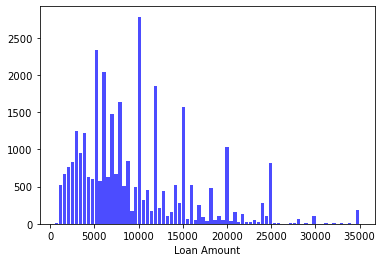

In [5]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()


There are 32 000 rows of data so the scatter plot may take a little while to plot.


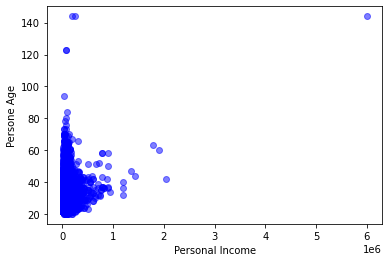

In [6]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue',alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()


## Analysis of Loan Status

The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear. Here we see count of loan status for different loan intent.

In [7]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'],cr_loan['loan_status'],margins = True))


loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [8]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))


loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [9]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'],cr_loan['loan_status'],values=cr_loan['loan_percent_income'],aggfunc='mean'))


loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


In [10]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],values=cr_loan['person_emp_length'],aggfunc='max'))


person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


## Scatter Plots

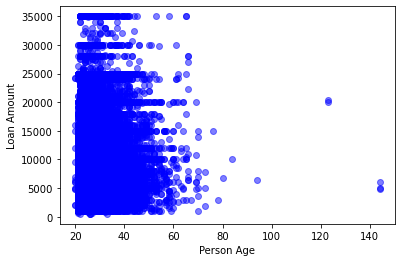

In [11]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()


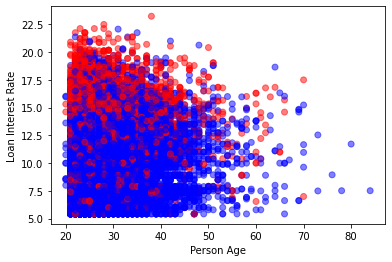

In [12]:
import matplotlib
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new=cr_loan.drop(cr_loan[cr_loan['person_age']>100].index)
# Create a scatter plot of age and interest rate
colors=["blue","red"]
plt.scatter(cr_loan_new['person_age'],cr_loan_new['loan_int_rate'],c=cr_loan_new['loan_status'],cmap=matplotlib.colors.ListedColormap(colors),alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()


## Replacing Missing Values

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

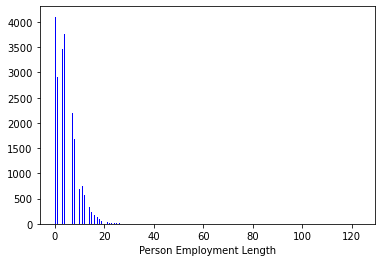

In [13]:
# Print an array of columns with null values
print(cr_loan.columns[cr_loan.isnull().any()])
# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())
# Replace the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()),inplace=True)
# Create a histogram of employment length
n,bins,patches=plt.hist(cr_loan['person_emp_length'],bins='auto',color='blue')
plt.xlabel("Person Employment Length")
plt.show()


In [14]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())
# Store the array on indices
indices=cr_loan[cr_loan['loan_int_rate'].isnull()].index
# Save the new data without missing data
cr_loan_clean=cr_loan.drop(indices)


3116


## Applying One-Hot Encoding on Categorical Columns

In [15]:
# Create two data sets for numeric and non-numeric data
cred_num=cr_loan_clean.select_dtypes(exclude=['object'])
cred_str=cr_loan_clean.select_dtypes(include=['object'])
# One-hot encode the non-numeric columns
cred_str_onehot=pd.get_dummies(cred_str)
# Union the one-hot encoded columns to the numeric ones
cr_loan_prep=pd.concat([cred_num,cred_str_onehot],axis=1)
# Print the columns in the new data set
print(cr_loan_prep.columns)


Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


## Data Preparation 

In [16]:
y = cr_loan_prep['loan_status'].copy()
df= cr_loan_prep.drop(['loan_status'],axis=1)
X=df.copy()
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,0.59,3,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0.10,2,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,0.57,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
# Use test_train_split to create the training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=123)


## Using Trees for Defaults Detection

You will now train a gradient boosted tree model on the credit data, and see a sample of some of the predictions. 


In [18]:
# Train a model
import xgboost as xgb

clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5],columns = ['prob_default'])
true_df = y_test.head()
# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop=True),preds_df],axis=1))


   loan_status  prob_default
0            0      0.069717
1            0      0.000514
2            0      0.001946
3            0      0.045644
4            0      0.432617


In [19]:
preds_df.head()

,prob_default
0,0.069717
1,0.000514
2,0.001946
3,0.045644
4,0.432617


# Default Classification Reporting

In [20]:
from sklearn.metrics import classification_report
# Create a dataframe for the probabilities of default
preds_df1 = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])
# Reassign loan status based on the threshold
preds_df1['loan_status']=preds_df1['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)
# Print the row counts for each loan status
print(preds_df1['loan_status'].value_counts())
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df1['loan_status'], target_names=target_names))


0    9775
1    2011
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9194
     Default       0.96      0.74      0.84      2592

    accuracy                           0.94     11786
   macro avg       0.94      0.87      0.90     11786
weighted avg       0.94      0.94      0.93     11786



## Visualizing Performance(Using ROC Curve) of the Credit Risk Model based on Logistic Regression  

0.8020532835567623


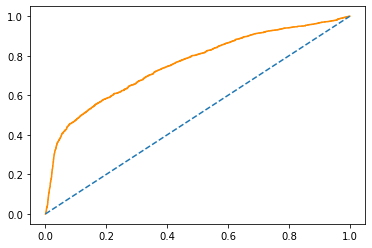

In [21]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Logistic Regression

clf_logistic = LogisticRegression(solver='lbfgs')
clf_logistic.fit(X_train,y_train)

# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity,thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)


In [22]:
print(preds[:5,:])

[[0.87019489 0.12980511]
 [0.75683904 0.24316096]
 [0.89967534 0.10032466]
 [0.74785167 0.25214833]
 [0.62234585 0.37765415]]


## XGBoost and Cross Validation

In [23]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
clf_gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

clf_gbt.fit(X_train, np.ravel(y_train))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:

# Print the accuracy score the model
print(clf_gbt.score(X_test, y_test))


0.935940946886136


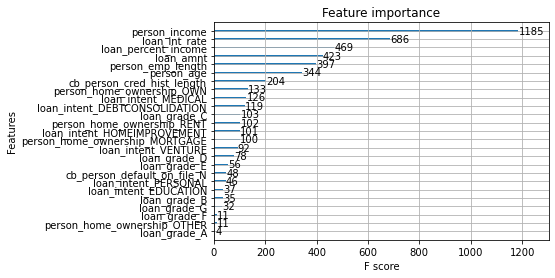

In [25]:
# Plot the column importance for this model
xgb.plot_importance(clf_gbt,importance_type='weight')
plt.show()


In [26]:

gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),cv_scores.std()*2))


[0.93574661 0.92986425 0.93506787 0.92984838]
Average accuracy: 0.93 (+/- 0.01)


## Calculating Expected Loss with Logistic Regression
It's time to estimate the total expected loss given all your decisions. The data frame test_pred_df has the probability of default for each loan and that loan's value. Use these two values to calculate the expected loss for each loan. Then, you can sum those values and get the total expected loss.
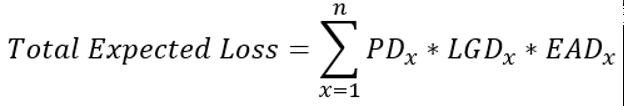

For this exercise, you will assume that the exposure is the full value of the loan, and the loss given default is 100%. This means that a default on each the loan is a loss of the entire amount.



In [27]:
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
25231,29,81900,13.0,8000,7.66,0.10,10,1,0,0,...,1,1,0,0,0,0,0,0,1,0
25262,31,47700,2.0,12000,11.99,0.25,5,0,0,0,...,0,0,1,0,0,0,0,0,1,0
21498,35,48000,6.0,5000,13.48,0.10,10,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1774,24,19200,2.0,2000,13.49,0.10,4,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11441,23,75000,7.0,10200,6.03,0.14,2,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [28]:
X_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
30015,47,70000,2.0,9000,12.87,0.13,14,0,0,0,...,0,0,0,1,0,0,0,0,1,0
22648,29,56700,14.0,11000,10.62,0.19,6,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9634,22,63000,6.0,3700,5.42,0.06,4,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3455,25,55000,2.0,10800,13.57,0.20,2,0,0,0,...,1,0,0,1,0,0,0,0,1,0
16426,26,32000,1.0,7500,13.79,0.23,3,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [29]:
test_pred_df = X_test.copy()
test_pred_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
30015,47,70000,2.0,9000,12.87,0.13,14,0,0,0,...,0,0,0,1,0,0,0,0,1,0
22648,29,56700,14.0,11000,10.62,0.19,6,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9634,22,63000,6.0,3700,5.42,0.06,4,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3455,25,55000,2.0,10800,13.57,0.20,2,0,0,0,...,1,0,0,1,0,0,0,0,1,0
16426,26,32000,1.0,7500,13.79,0.23,3,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [30]:
# Logistic Regression

clf_logistic = LogisticRegression(solver='lbfgs')
clf_logistic.fit(X_train,y_train)

# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(test_pred_df)

# Print the accuracy score the model
print(clf_logistic.score(test_pred_df, y_test))

# Calculating Probability of Default
prob_default = preds[:, 1]


0.8020532835567623


In [31]:
test_pred_df['prob_default'] = prob_default
test_pred_df['loss_given_default'] = 1
test_pred_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,prob_default,loss_given_default
30015,47,70000,2.0,9000,12.87,0.13,14,0,0,0,...,0,1,0,0,0,0,1,0,0.129805,1
22648,29,56700,14.0,11000,10.62,0.19,6,0,0,1,...,1,0,0,0,0,0,1,0,0.243161,1
9634,22,63000,6.0,3700,5.42,0.06,4,1,0,0,...,0,0,0,0,0,0,1,0,0.100325,1
3455,25,55000,2.0,10800,13.57,0.20,2,0,0,0,...,0,1,0,0,0,0,1,0,0.252148,1
16426,26,32000,1.0,7500,13.79,0.23,3,0,0,0,...,0,1,0,0,0,0,1,0,0.377654,1


In [32]:
# Calculate the bank's expected loss and assign it to a new column
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loan_amnt']*test_pred_df['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)
# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))


Total expected loss:  $27,417,353.88


In [33]:
test_pred_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,prob_default,loss_given_default,expected_loss
30015,47,70000,2.0,9000,12.87,0.13,14,0,0,0,...,1,0,0,0,0,1,0,0.129805,1,1168.245949
22648,29,56700,14.0,11000,10.62,0.19,6,0,0,1,...,0,0,0,0,0,1,0,0.243161,1,2674.770556
9634,22,63000,6.0,3700,5.42,0.06,4,1,0,0,...,0,0,0,0,0,1,0,0.100325,1,371.201250
3455,25,55000,2.0,10800,13.57,0.20,2,0,0,0,...,1,0,0,0,0,1,0,0.252148,1,2723.201955
16426,26,32000,1.0,7500,13.79,0.23,3,0,0,0,...,1,0,0,0,0,1,0,0.377654,1,2832.406091


## Using XGBoost for Predicting Loan Default Risk

In [34]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

clf_gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

clf_gbt.fit(X_train, np.ravel(y_train))


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
X_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
30015,47,70000,2.0,9000,12.87,0.13,14,0,0,0,...,0,0,0,1,0,0,0,0,1,0
22648,29,56700,14.0,11000,10.62,0.19,6,0,0,1,...,0,0,1,0,0,0,0,0,1,0
9634,22,63000,6.0,3700,5.42,0.06,4,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3455,25,55000,2.0,10800,13.57,0.20,2,0,0,0,...,1,0,0,1,0,0,0,0,1,0
16426,26,32000,1.0,7500,13.79,0.23,3,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [36]:
# Print the accuracy score the model
print(clf_gbt.score(X_test, y_test))



0.935940946886136


In [37]:
# Create predictions and store them in a variable
preds = clf_gbt.predict_proba(X_test)

# Calculating Probability of Default
prob_default = preds[:, 1]

test_pred_df['prob_default'] = prob_default
test_pred_df['loss_given_default'] = 1
test_pred_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,prob_default,loss_given_default,expected_loss
30015,47,70000,2.0,9000,12.87,0.13,14,0,0,0,...,1,0,0,0,0,1,0,0.067312,1,1168.245949
22648,29,56700,14.0,11000,10.62,0.19,6,0,0,1,...,0,0,0,0,0,1,0,0.001956,1,2674.770556
9634,22,63000,6.0,3700,5.42,0.06,4,1,0,0,...,0,0,0,0,0,1,0,0.009433,1,371.201250
3455,25,55000,2.0,10800,13.57,0.20,2,0,0,0,...,1,0,0,0,0,1,0,0.077760,1,2723.201955
16426,26,32000,1.0,7500,13.79,0.23,3,0,0,0,...,1,0,0,0,0,1,0,0.550950,1,2832.406091


In [38]:
# Calculate the bank's expected loss and assign it to a new column
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loan_amnt']*test_pred_df['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)
# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))


Total expected loss:  $26,852,450.14
